In [1]:
import tensorflow as tf
import gym

In [2]:
print("Tensorflow Version:{}".format(tf.__version__))

Tensorflow Version:2.0.0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('test/Advertising.csv')

In [5]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


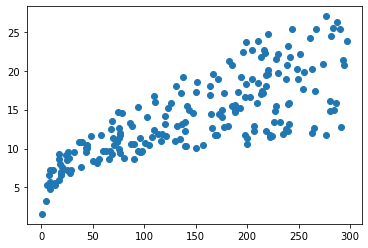

In [6]:
plt.scatter(data.TV,data.sales)

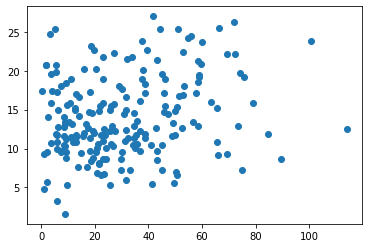

In [7]:
plt.scatter(data.newspaper,data.sales)

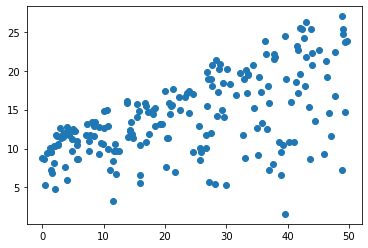

In [8]:
plt.scatter(data.radio,data.sales)

In [9]:
x = data.iloc[:, 1:-1]
y = data.iloc[:, -1]

In [10]:
model = tf.keras.Sequential([tf.keras.layers.Dense(10, input_shape=(3,),activation='relu'),
                            tf.keras.layers.Dense(1)]
                           )

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                40        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='adam',
              loss='mse'
)

In [13]:
model.fit(x, y, epochs=100)

Train on 200 samples
Epoch 1/100
200/200 [==============================] - 1s 3ms/sample - loss: 532.2162
Epoch 2/100
200/200 [==============================] - 0s 90us/sample - loss: 431.3367
Epoch 3/100
200/200 [==============================] - 0s 95us/sample - loss: 344.4393
Epoch 4/100
200/200 [==============================] - 0s 100us/sample - loss: 273.0780
Epoch 5/100
200/200 [==============================] - 0s 105us/sample - loss: 215.4810
Epoch 6/100
200/200 [==============================] - 0s 100us/sample - loss: 168.6816
Epoch 7/100
200/200 [==============================] - 0s 105us/sample - loss: 131.1766
Epoch 8/100
200/200 [==============================] - 0s 110us/sample - loss: 100.8119
Epoch 9/100
200/200 [==============================] - 0s 95us/sample - loss: 77.3840
Epoch 10/100
200/200 [==============================] - 0s 105us/sample - loss: 61.6410
Epoch 11/100
200/200 [==============================] - 0s 110us/sample - loss: 48.3735
Epoch 12/100
200/

200/200 [==============================] - 0s 75us/sample - loss: 3.2253
Epoch 94/100
200/200 [==============================] - 0s 75us/sample - loss: 3.2239
Epoch 95/100
200/200 [==============================] - 0s 75us/sample - loss: 3.2135
Epoch 96/100
200/200 [==============================] - 0s 70us/sample - loss: 3.2053
Epoch 97/100
200/200 [==============================] - 0s 90us/sample - loss: 3.2035
Epoch 98/100
200/200 [==============================] - 0s 85us/sample - loss: 3.1978
Epoch 99/100
200/200 [==============================] - 0s 85us/sample - loss: 3.1908
Epoch 100/100
200/200 [==============================] - 0s 89us/sample - loss: 3.1858


In [14]:
test = data.iloc[:10, 1:-1]

In [15]:
model.predict(test)

array([[22.33856  ],
       [11.056438 ],
       [10.668882 ],
       [19.182241 ],
       [13.022838 ],
       [10.717039 ],
       [10.9327965],
       [11.219879 ],
       [ 1.2696801],
       [11.050207 ]], dtype=float32)

In [16]:
test = data.iloc[:10, -1]
test

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [17]:
data = pd.read_csv('test/credit-a.csv',header=None)

In [18]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,30.83,0.000,0,0,9,0,1.25,0,0,1,1,0,202,0.0,-1
1,1,58.67,4.460,0,0,8,1,3.04,0,0,6,1,0,43,560.0,-1
2,1,24.50,0.500,0,0,8,1,1.50,0,1,0,1,0,280,824.0,-1
3,0,27.83,1.540,0,0,9,0,3.75,0,0,5,0,0,100,3.0,-1
4,0,20.17,5.625,0,0,9,0,1.71,0,1,0,1,2,120,0.0,-1


In [19]:
data.iloc[:, -1].value_counts()  

 1    357
-1    296
Name: 15, dtype: int64

In [20]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1].replace(-1,0)

In [21]:
model = tf.keras.Sequential()

In [22]:
model.add(tf.keras.layers.Dense(4, input_shape=(15,),activation='relu'))
model.add(tf.keras.layers.Dense(4,  activation='relu'))
model.add(tf.keras.layers.Dense(1,  activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 4)                 64        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['acc']
)

In [25]:
history = model.fit(x,y,epochs=100)

Train on 653 samples
Epoch 1/100
653/653 [==============================] - 0s 296us/sample - loss: 4.5136 - acc: 0.4410
Epoch 2/100
653/653 [==============================] - 0s 78us/sample - loss: 3.1194 - acc: 0.4380
Epoch 3/100
653/653 [==============================] - 0s 86us/sample - loss: 1.6382 - acc: 0.4349
Epoch 4/100
653/653 [==============================] - 0s 90us/sample - loss: 0.7606 - acc: 0.5482
Epoch 5/100
653/653 [==============================] - 0s 101us/sample - loss: 0.6701 - acc: 0.6508
Epoch 6/100
653/653 [==============================] - 0s 108us/sample - loss: 0.6670 - acc: 0.6493
Epoch 7/100
653/653 [==============================] - 0s 93us/sample - loss: 0.6629 - acc: 0.6524
Epoch 8/100
653/653 [==============================] - 0s 96us/sample - loss: 0.6625 - acc: 0.6493
Epoch 9/100
653/653 [==============================] - 0s 81us/sample - loss: 0.6614 - acc: 0.6524
Epoch 10/100
653/653 [==============================] - 0s 84us/sample - loss: 0.6623

Epoch 81/100
653/653 [==============================] - 0s 84us/sample - loss: 0.6082 - acc: 0.6662
Epoch 82/100
653/653 [==============================] - 0s 73us/sample - loss: 0.6078 - acc: 0.6646
Epoch 83/100
653/653 [==============================] - 0s 75us/sample - loss: 0.6070 - acc: 0.6631
Epoch 84/100
653/653 [==============================] - 0s 75us/sample - loss: 0.6036 - acc: 0.6631
Epoch 85/100
653/653 [==============================] - 0s 72us/sample - loss: 0.6048 - acc: 0.6677
Epoch 86/100
653/653 [==============================] - 0s 73us/sample - loss: 0.6032 - acc: 0.6708
Epoch 87/100
653/653 [==============================] - 0s 73us/sample - loss: 0.6057 - acc: 0.6738
Epoch 88/100
653/653 [==============================] - 0s 73us/sample - loss: 0.6029 - acc: 0.6723
Epoch 89/100
653/653 [==============================] - 0s 73us/sample - loss: 0.6030 - acc: 0.6723
Epoch 90/100
653/653 [==============================] - 0s 78us/sample - loss: 0.6022 - acc: 0.6769


In [26]:
history.history.keys()

dict_keys(['loss', 'acc'])

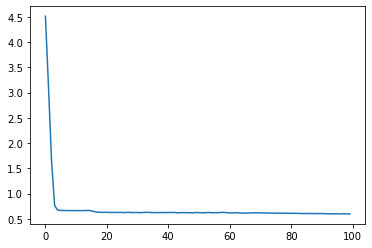

In [27]:
plt.plot(history.epoch, history.history.get('loss'))

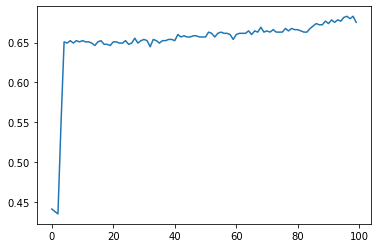

In [28]:
plt.plot(history.epoch, history.history.get('acc'))

In [29]:
(train_image, train_lable), (test_image, test_lable) = tf.keras.datasets.fashion_mnist.load_data()

In [30]:
train_image.shape

(60000, 28, 28)

In [31]:
train_lable.shape

(60000,)

In [32]:
test_image.shape, test_lable.shape

((10000, 28, 28), (10000,))

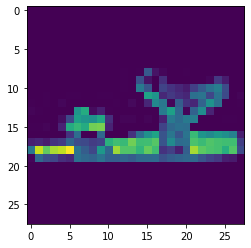

In [33]:
plt.imshow(train_image[-1])

In [34]:
train_image[-1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [35]:
np.max(train_image[-1])

255

In [36]:
np.min(train_image[-1])

0

In [37]:
train_lable

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [38]:
train_image = train_image/255
test_image = test_image/255

In [39]:
train_image.shape

(60000, 28, 28)

In [40]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [41]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

In [42]:
model.fit(train_image, train_lable, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.4982 - acc: 0.8255
Epoch 2/5
60000/60000 [==============================] - 4s 58us/sample - loss: 0.3731 - acc: 0.8656
Epoch 3/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3384 - acc: 0.8757
Epoch 4/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3126 - acc: 0.8854
Epoch 5/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2959 - acc: 0.8909


In [43]:
model.evaluate(test_image, test_lable)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.33999170658588407, 0.8789]

In [44]:
train_lable

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [45]:
train_lable_onehot = tf.keras.utils.to_categorical(train_lable)

In [46]:
train_lable_onehot

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [47]:
train_lable_onehot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [48]:
train_lable_onehot[-1]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [49]:
test_lable_onehot = tf.keras.utils.to_categorical(test_lable)

In [50]:
test_lable_onehot

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [51]:
test_lable

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [68]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['acc']
             )

In [61]:
model.fit(train_image, train_lable_onehot, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3244 - acc: 0.8817
Epoch 2/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3020 - acc: 0.8884
Epoch 3/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2858 - acc: 0.8941
Epoch 4/5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2736 - acc: 0.8981
Epoch 5/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2632 - acc: 0.9027


In [55]:
predict = model.predict(test_image)

In [56]:
predict.shape

(10000, 10)

In [57]:
predict[0]

array([2.5816860e-05, 9.6832707e-08, 2.0262830e-06, 1.5688812e-06,
       1.2913613e-06, 2.3199484e-02, 1.4843385e-05, 4.5006152e-02,
       1.7686776e-04, 9.3157184e-01], dtype=float32)

In [58]:
np.argmax(predict[0])

9

In [59]:
test_lable_onehot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [84]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [85]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_24 (Dense)             (None, 10)               

In [86]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['acc']
             )

In [83]:
model.fit(train_image, train_lable_onehot, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 116us/sample - loss: 0.8708 - acc: 0.6771
Epoch 2/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.6296 - acc: 0.7719
Epoch 3/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.5789 - acc: 0.7959
Epoch 4/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.5503 - acc: 0.8071
Epoch 5/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.5324 - acc: 0.8127
Epoch 6/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.5202 - acc: 0.8178
Epoch 7/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.5140 - acc: 0.8205
Epoch 8/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.5014 - acc: 0.8245
Epoch 9/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.4986 - acc: 0.8240
Epoch 10/10
60000/60000 [==============================] -

In [87]:
history = model.fit(train_image, train_lable_onehot,
                    epochs=10,
                   validation_data=(test_image, test_lable_onehot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.7475 - acc: 0.7230 - val_loss: 0.4896 - val_acc: 0.8218
Epoch 2/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.5491 - acc: 0.8034 - val_loss: 0.4412 - val_acc: 0.8408
Epoch 3/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.5070 - acc: 0.8184 - val_loss: 0.4449 - val_acc: 0.8374
Epoch 4/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.4856 - acc: 0.8267 - val_loss: 0.4293 - val_acc: 0.8482
Epoch 5/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.4689 - acc: 0.8313 - val_loss: 0.4222 - val_acc: 0.8483
Epoch 6/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.4544 - acc: 0.8372 - val_loss: 0.4102 - val_acc: 0.8522
Epoch 7/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.4497 - acc: 0.8394 - val_l

In [88]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

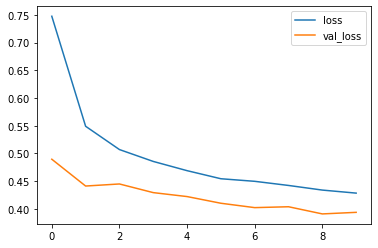

In [89]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()

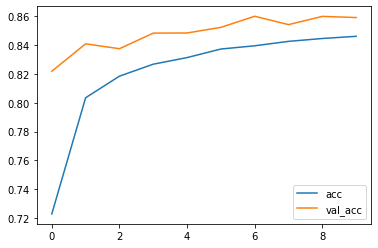

In [90]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()

In [111]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(28, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 28)                21980     
_________________________________________________________________
dense_34 (Dense)             (None, 10)                290       
Total params: 22,270
Trainable params: 22,270
Non-trainable params: 0
_________________________________________________________________


In [112]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['acc']
             )

In [113]:
history = model.fit(train_image, train_lable_onehot,
                    epochs=20,
                   validation_data=(test_image, test_lable_onehot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 90us/sample - loss: 0.5558 - acc: 0.8092 - val_loss: 0.4900 - val_acc: 0.8220
Epoch 2/20
60000/60000 [==============================] - 5s 84us/sample - loss: 0.4191 - acc: 0.8520 - val_loss: 0.4319 - val_acc: 0.8461
Epoch 3/20
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3870 - acc: 0.8634 - val_loss: 0.4492 - val_acc: 0.8384
Epoch 4/20
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3653 - acc: 0.8694 - val_loss: 0.4082 - val_acc: 0.8555
Epoch 5/20
60000/60000 [==============================] - 5s 82us/sample - loss: 0.3510 - acc: 0.8736 - val_loss: 0.3959 - val_acc: 0.8593
Epoch 6/20
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3409 - acc: 0.8768 - val_loss: 0.3891 - val_acc: 0.8589
Epoch 7/20
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3299 - acc: 0.8815 - val_loss: 0.

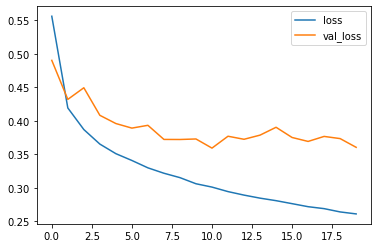

In [114]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()

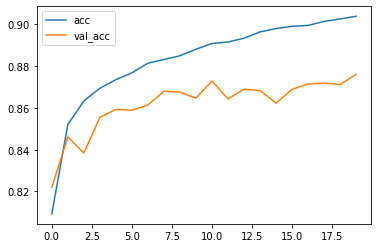

In [115]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()